# Линейная алгебра. Поток тензоров.
[Слайды "Матрицы и векторы"](https://docs.google.com/presentation/d/e/2PACX-1vTMu3au2p6MYIfy5kU5sMHGn1PWxn2mlBj1OPYVmxnmhp2Ik5qQn3nUbrSIYdLiQlDiXYiTwlVg9tSz/pub?start=false&loop=false&delayms=3000) | [Слайды "Как устроены нейросети"](https://docs.google.com/presentation/d/e/2PACX-1vQXLqq5rPJSE3YSCo0402VgEnS86hLtD386-Y1hJDVljhjPlFYEWvHnMCfOgLlLJrHG5J_GUNF4U7V2/pub?start=false&loop=false&delayms=3000)

<img src='./images/real_nn.png'>

## Библиотека numpy - NUMerical PYthon

In [1]:
%matplotlib inline
import numpy as np
import os

In [2]:
a = [1,2,3,4]
b = [10, 20, 30, 40]

In [3]:
a[0], b[0]

(1, 10)

In [4]:
a * 2

[1, 2, 3, 4, 1, 2, 3, 4]

In [5]:
# ожидаем ошибку, ведь операция умножения не определена для списков

a * b

TypeError: can't multiply sequence by non-int of type 'list'

In [6]:
a_array = np.array(a)
b_array = np.array(b)

In [7]:
a_array[0]

1

In [8]:
a_array * 2

array([2, 4, 6, 8])

In [9]:
a_array * b_array

array([ 10,  40,  90, 160])

In [10]:
a_array.dot(b_array)

300

### Пример использования: матрица поворота

В математике матрицы называют операторами, которыми можно подействовать на точку в многомерном пространстве: повернуть, растянуть, отразить. Главное свойство этих операторов заключается в том, что произведение матриц (операторов) будет являться композицией преобразований. 

In [11]:
import math
import matplotlib.pyplot as plt

In [82]:
def rotate(point, angle):
    rad = math.pi / 180 * angle

    rot = [
        [ math.cos(rad), math.sin(rad)],
        [-math.sin(rad), math.cos(rad)]
    ]
    
    print(rot)
    
    rot = np.array(rot)
    point = np.array(point)
    print(point.dot(rot))
    
    return point.dot(rot)

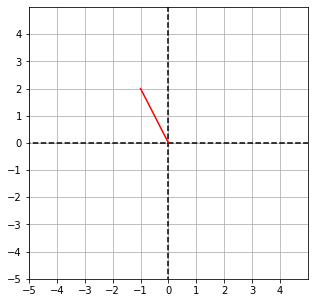

In [87]:
point = (-1, 2)

plt.figure(figsize=(5,5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.grid()
plt.hlines(0, -6, 6, linestyles='--')
plt.vlines(0, -6, 6, linestyles='--')
plt.plot([0, point[0]], [0, point[1]], color='red')

[[-0.1736481776669303, 0.984807753012208], [-0.984807753012208, -0.1736481776669303]]
[-1.79596733 -1.33210411]


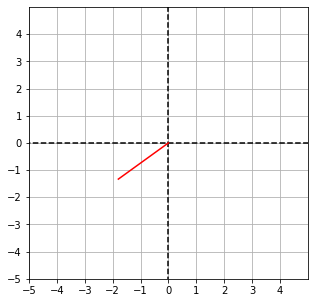

In [88]:
rotated_point = rotate(point, 100)

plt.figure(figsize=(5,5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.grid()
plt.hlines(0, -6, 6, linestyles='--')
plt.vlines(0, -6, 6, linestyles='--')
plt.plot([0, rotated_point[0]], [0, rotated_point[1]], color='red')

In [ ]:
def rotate_twice(point, angle1, angle2):
    rad1 = math.pi / 180 * angle1
    rad2 = math.pi / 180 * angle2

    rot_1 = [
        [ math.cos(rad1), math.sin(rad1)],
        [-math.sin(rad1), math.cos(rad1)]
    ]

    rot_2 = [
        [ math.cos(rad2), math.sin(rad2)],
        [-math.sin(rad2), math.cos(rad2)]
    ]
    
    rot_1 = np.array(rot_1)
    rot_2 = np.array(rot_2)
    rot = rot_1.dot(rot_2)
    
    point = np.array(point)
    
    return point.dot(rot)

In [ ]:
twice_rotated_point = rotate_twice(point, -40, -50)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.hlines(0, -6, 6, linestyles='--')
plt.vlines(0, -6, 6, linestyles='--')
plt.plot([0, twice_rotated_point[0]], [0, twice_rotated_point[1]], color='red')

А теперь приведем пример с растяжением и одновременным изменением перспективы: "уроним" изображение енота вперед

In [ ]:
import cv2
import PIL

img = cv2.imread(os.path.join('images', 'raccoon.jpg'))

rows,cols,ch = img.shape
pts1 = np.float32([[0,0],[cols, 0],[0, rows],[cols, rows]])
pts2 = np.float32([[100,200],[cols - 100, 200],[0, rows],[cols, rows]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(cols,rows))

PIL.Image.fromarray(dst)

## Фреймворк (библиотека) PyTorch

In [ ]:
import torch

In [ ]:
a_tensor = torch.Tensor(a)
b_tensor = torch.Tensor(b)

In [ ]:
a_tensor * 2

In [ ]:
a_tensor * b_tensor

In [ ]:
a_tensor.dot(b_tensor)

---

## Поток тензоров

Любую картинку можно представить в виде вектора.

<img src='./images/image_to_vector.png' width='60%'>

In [ ]:
input_tensor = torch.rand(1, 8 * 8 * 3)
input_tensor.shape

<font color='red'>! Важно запомнить </font>, что np.dot( ) отличается по своему поведению от torch.dot( ). В numpy функция dot принимает на вход как одномерные вектора, так и матрицы, в PyTorh же только одномерные вектора. Для того, чтобы перемножить матрицы в PyTorch, требуется использовать функцию mm( ) - сокращение от *matrix multiplication*.

In [ ]:
# задайте размеры матриц таким образом, чтобы на выходе у вас
# был вектор длинной 32

m1 = torch.rand(, )
m2 = torch.rand(, )
m3 = torch.rand(, )

output_tensor = input_tensor.mm(m1).mm(m2).mm(m3)
output_tensor.shape

### torch.nn.Module

In [ ]:
class MyModel(torch.nn.Module):
    def __init__(self, input_shape):
        super(MyModel, self).__init__()
        
        self.fc1 = torch.nn.Linear(input_shape, 64, bias=True)
        self.fc2 = torch.nn.Linear(64, 32, bias=True)
        self.fc3 = torch.nn.Linear(32, 32, bias=True)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [ ]:
model = MyModel(192)

In [ ]:
output = model(input_tensor)

In [ ]:
output.shape

### Пропускаем не одну картинку, а батч картинок через модель

In [ ]:
batch_size = 16

batch_input = torch.rand((batch_size, 192))

In [ ]:
output = model(batch_input)

In [ ]:
output.shape

### Используем cuda для ускорения потока тензоров

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
model = model.to(device)
batch_input = batch_input.to(device)

output = model(batch_input)

# если использование gpu возможно, то output.get_device() вернет индекс видеокарты (начиная с нуля)
# иначе, вернет -1 или выбросит ошибку

output.shape, output.get_device()